In [130]:
# Import Statements

import pandas as pd
import sys
import numpy as np

from sklearn.model_selection import train_test_split

In [39]:
# Box Folder Location containing data files

apple_folder_loc = "~/Library/CloudStorage/Box-Box/Capstone/Capstone/Data Science Capstone"
windows_folder_loc = "~/Box/Capstone/Capstone/Data Science Capstone"
linux_folder_loc = ""

folder_loc = apple_folder_loc if sys.platform.startswith("darwin") else (windows_folder_loc if sys.platform.startswith("win") else linux_folder_loc)

In [4]:
# Data Files

all_vars_data_file_name = "AllVars2NFTI19-21.xlsx"
discharge_data_file_name = "NFTI Report Additions 9-13-22.xlsx"
procedures_data_file_name = "Raw Trauma Triage Registry Data NFTI.xlsx"

In [5]:
# Last 3 years dataset

all_vars_data = pd.read_excel("{}/{}".format(folder_loc, all_vars_data_file_name))
print(all_vars_data.shape)
all_vars_data.head(10)

(5146, 212)


,MRN,LastName,DOB,Age,Sex,SexCatNum,Race,RaceCatNum,EDArrival,Mechanism,...,FinalIntwithin3,FinalNFTI,NFTILevel,FinalNFTIOver,FinalNFTIUnder,FinalNFTICorrect,CribariLevel,CribariOver,CribariUnder,CribariCorrect
0,15038,Ellis ...,2027-06-15,92.40,Female,1,White,0,2019-11-08 19:18:00,Motor Vehicle Crash,...,0,0,C,0,0,1,0,0,0.0,1.0
1,132307,Milliman ...,1937-09-21,81.69,Female,1,White,0,2019-05-30 16:59:00,Motor Vehicle Crash,...,0,1,C,0,1,0,1,0,1.0,0.0
2,134166,Romano ...,1937-11-15,81.96,Male,0,White,0,2019-11-02 15:04:00,Fall,...,0,1,C,0,1,0,0,0,0.0,1.0
3,161991,Grunert ...,1934-05-15,85.52,Male,0,White,0,2019-11-23 10:30:00,Fall,...,0,0,P,0,0,1,0,0,0.0,1.0
4,163678,Russi ...,1940-02-14,79.29,Male,0,White,0,2019-05-31 04:48:00,Motor Vehicle Crash,...,1,1,C,0,1,0,1,0,1.0,0.0
5,166382,Meisenzahl ...,1940-02-06,79.68,Male,0,White,0,2019-10-13 14:12:00,Fall,...,1,1,F,0,0,1,0,1,0.0,0.0
6,173036,Gambitta ...,1940-12-26,78.89,Male,0,White,0,2019-11-16 19:02:00,Fall,...,1,1,F,0,0,1,1,0,0.0,1.0
7,247117,Howard ...,1941-12-04,77.18,Male,0,White,0,2019-02-08 17:52:00,Fall,...,0,0,C,0,0,1,0,0,0.0,1.0
8,255120,Williams ...,1938-12-20,80.04,Female,1,White,0,2019-01-05 13:36:00,Fall,...,0,1,P,0,1,0,1,0,1.0,0.0
9,262395,Morano ...,1947-04-12,72.50,Male,0,White,0,2019-10-12 21:22:00,Fall,...,0,1,C,0,1,0,0,0,0.0,1.0


### Column Selection

In [6]:
# Dropping columns

all_vars_data = all_vars_data.drop(['PHTx', 'Mechanism', 'DOB', 'EDGCS', 'EDSBP', 'EDBPNorm', 'EDPulse', 'PRBCIn4H', 'PRBCSin4', 'EDDischarge', 'EDTx', 'EDDischarge', 'EDDispo', 'EDDispoSpecificLocation', 'EDtoICU', 'ICUDays', 'ICU3', 'ICUDaysTotal', 'EDtoOR', 'TFOR', 'OREncounters', 'ORICD9', 'Operation', 'ORICD10', 'Operation1', 'ORTime', 'ORElapsedTime', 'ORElapsedTimeMe', 'TFORwithin90', 'Mortality','DeathElapsedTimecalc','Death60','HospLOSElapsedTimecalc','DeathElapsedTimecalc60','ArrInt','EDInt','Intwithin3','VentilatedAtAll','VentDays','EDCPR','Thora', 'AdmitService','DischargeDate','DischargeDispoIdx','DischargeDisposition','HospitalLOSDays','HealthStatusPriorToInj','HealthStatusAtDC','DCGCS','Injuries','Angiography', 'IRICD9','IROperation','IRICD10','IROperation1','IRTime','IRElapsedTime','IRElapsedTimeMe', 'TFNFTIAdds','NFTIAddsEDArrival','DischargeEvent','NFTIMRN','NFTILastName','NFTIAge','NFTIArrivalDate', 'PredActivation', 'Activation', 'OverUnder'], axis=1)


In [7]:
all_vars_data.shape

(5146, 145)

## Data Cleaning and PreProcessing

### Check NULL / NA

In [8]:
# Null value count percent per column
null_count_cols = all_vars_data.isnull().sum(axis = 0)
null_count_cols = null_count_cols[null_count_cols>0].sort_values(ascending=False)/all_vars_data.shape[0]
null_count_cols

EDDispoORWithin90mins    0.876992
EDDispoICULOS2Days       0.711815
MeanPHRTS                0.163817
WorstPHRTS               0.163817
BestPHRTS                0.163817
FirstPHRTS               0.163817
MedianPHRTS              0.163817
FirstPHSBP               0.141858
FirstPHSBPNorm           0.141858
MedianPHSBP              0.141858
WorstPHSBP               0.141858
BestPHSBP                0.141858
MeanPHSBP                0.141858
BestPHSBPNorm            0.141858
WorstPHSBPNorm           0.141858
MeanPHSBPNorm            0.141469
MedianPHSBPNorm          0.141469
PsTRISS                  0.120288
MedianPHPulse            0.111349
MeanPHPulse              0.111349
WorstPHPulse             0.111349
BestPHPulse              0.111349
FirstPHPulse             0.111349
MedianPHGCS              0.107851
WorstPHGCS               0.107851
BestPHGCS                0.107851
FirstPHGCS               0.107851
MeanPHGCS                0.107851
ISS                      0.077925
Comorbids     

In [9]:
# Drop cols with null values more than 70 %
null_drop_cols = null_count_cols[null_count_cols>0.7].index
all_vars_data = all_vars_data.drop(null_drop_cols, axis=1)
all_vars_data.shape

(5146, 143)

In [10]:
# Null value count percent per row
null_count_rows = all_vars_data.isnull().sum(axis = 1)
null_count_rows = null_count_rows[null_count_rows>0].sort_values(ascending=False)/all_vars_data.shape[1]
null_count_rows

5141    0.209790
5143    0.202797
1697    0.188811
2110    0.188811
3491    0.188811
          ...   
4657    0.006993
4191    0.006993
1379    0.006993
663     0.006993
2945    0.006993
Length: 1372, dtype: float64

In [11]:
# Drop rows with null values more than 10 %
null_drop_rows = null_count_rows[null_count_rows>0.1].index
all_vars_data = all_vars_data.drop(null_drop_rows, axis=0)
all_vars_data.shape

(4416, 143)

In [12]:
all_vars_data = all_vars_data.reset_index(drop=True)

### Trim whitespaces

In [13]:
all_vars_data['MRN'] = all_vars_data['MRN'].str.strip()

### Check duplicates

In [14]:
print(all_vars_data.shape[0])
print(all_vars_data[['MRN', 'EDArrival']].drop_duplicates().shape[0])

4416
4410


We have 8 duplicates.

In [15]:
# Remove duplicates in a way that choose last record from duplicated ones
all_vars_data = all_vars_data.sort_values('EDArrival').drop_duplicates(subset=['MRN', 'EDArrival'], keep='last')

In [16]:
all_vars_data.shape

(4410, 143)

In [17]:
all_vars_data = all_vars_data.reset_index(drop=True)

### Unique value count of each column

In [18]:
cols = all_vars_data.dtypes[all_vars_data.dtypes != 'float64']
cols = cols[cols != 'int64']
cols = cols[cols != 'uint8']
cols = cols[cols != 'datetime64[ns]']

In [19]:
cols.drop_duplicates()

MRN      object
ABUSE      bool
dtype: object

In [20]:
cols = cols.index

In [21]:
cols = cols[~cols.isin(['MRN', 'LastName'])]
cols

Index(['Sex', 'Race', 'MechFixed', 'ABUSE', 'ASSAULT', 'FALL', 'GSW', 'MVC',
       'PEDS', 'SPORT', 'STAB', 'Level', 'PHHoTN', 'EKG', 'SPINE', 'IVF',
       'IVF500', 'IVF2000', 'IVF2001', 'IVFunk', 'IO', 'MEDS', 'O2', 'LIMB',
       'BLEED', 'HEM', 'TQ', 'PRESS', 'PELVIC', 'DRESS', 'AIR', 'BVM', 'ETT',
       'SUCK', 'LMA', 'ORAL', 'NEEDLE', 'Comorbids', 'HTN', 'BldDo', 'DM',
       'ROIDS', 'Dementia', 'COPD', 'Obesity', 'Smoker', 'Cirrhosis', 'CVA',
       'TXP', 'HrtDz', 'CAD', 'MI', 'Angina', 'CTSURG', 'CHF', 'DUD', 'ETOH',
       'DVT', 'Psych', 'MajPsych', 'ADHD', 'PERSDO', 'Cancer', 'Prems',
       'Seizure', 'Asthma', 'HIV', 'DEP', 'WARFARIN', 'PD', 'AD', 'PREGO',
       'CONG', 'RF', 'Vascular', 'PAD', 'PVD', 'SCI', 'RA', 'PHCPR', 'MS',
       'IBD', 'PsTRISS', 'ChestTube', 'EmergentIntubation', 'ICP',
       'Craniotomy', 'FinalIntwithin3', 'NFTILevel'],
      dtype='object')

In [22]:
for cc in cols:
    print(all_vars_data[cc].value_counts())

Male       2975
Female     1431
Unknown       4
Name: Sex, dtype: int64
White                                        3114
Black                                        1002
Other                                         165
Unknown                                        88
Asian                                          38
Native Hawaiian or Other Pacific Islander       1
American Indian                                 1
Name: Race, dtype: int64
MVC           1540
Fall          1247
Stab           397
GSW            309
Sports         295
Pedestrian     238
Assault        132
Unknown        103
Crush           33
Machine         31
Animal          21
Glass           16
Jump            13
Lawnmower       10
Burn             7
Explosion        7
Bite             4
Aircraft         2
Hanging          2
Drowning         1
Name: MechFixed, dtype: int64
False    4410
Name: ABUSE, dtype: int64
False    4278
True      132
Name: ASSAULT, dtype: int64
False    3163
True     1247
Name: FALL, dtype: 

### TODO:
1. We need to eliminate some columns here. Columns that have the same value almost for all patient but we need to be careful. Some variables that have the same value almost for all patients can have significant effect on 'Level'. Very small number of values can decide Level of patients in these columns. Need to be analyzed further.
2. We need to conver Yes|No to True|False Boolean.

### Define Schema

Source code: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

In [23]:
all_vars_data.dtypes

MRN                  object
LastName             object
Age                 float64
Sex                  object
SexCatNum             int64
                     ...   
FinalNFTICorrect      int64
CribariLevel          int64
CribariOver           int64
CribariUnder        float64
CribariCorrect      float64
Length: 143, dtype: object

In [24]:
all_vars_data = all_vars_data.convert_dtypes(infer_objects=False)

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(all_vars_data.dtypes)

MRN                           string
LastName                      string
Age                          Float64
Sex                           string
SexCatNum                      Int64
Race                          string
RaceCatNum                     Int64
EDArrival             datetime64[ns]
MechFixedCatNum                Int64
MechFixed                     string
ABUSE                        boolean
ASSAULT                      boolean
FALL                         boolean
GSW                          boolean
MVC                          boolean
PEDS                         boolean
SPORT                        boolean
STAB                         boolean
OTHER                          Int64
BvsPIdx                        Int64
Level                         string
PHHoTN                        object
EKG                          boolean
SPINE                        boolean
IVF                          boolean
IVF500                       boolean
IVF2000                      boolean
I

In [26]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(all_vars_data)

,MRN,LastName,Age,Sex,SexCatNum,Race,RaceCatNum,EDArrival,MechFixedCatNum,MechFixed,ABUSE,ASSAULT,FALL,GSW,MVC,PEDS,SPORT,STAB,OTHER,BvsPIdx,Level,PHHoTN,EKG,SPINE,IVF,IVF500,IVF2000,IVF2001,IVFunk,IO,MEDS,O2,LIMB,BLEED,HEM,TQ,PRESS,PELVIC,DRESS,AIR,BVM,ETT,SUCK,LMA,ORAL,NEEDLE,CPR,EDHoTN,Comorbids,HTN,BldDo,DM,ROIDS,Dementia,COPD,Obesity,Smoker,Cirrhosis,CVA,TXP,HrtDz,CAD,MI,Angina,CTSURG,CHF,DUD,ETOH,DVT,Psych,MajPsych,ADHD,PERSDO,Cancer,Prems,Seizure,Asthma,HIV,DEP,WARFARIN,PD,AD,PREGO,CONG,RF,Vascular,PAD,PVD,SCI,RA,PHCPR,MS,IBD,AZ,PANC,ComorbidTally,PsTRISS,ISS,TFIR,ChestTube,EmergentIntubation,ICP,Craniotomy,FirstPHSBP,BestPHSBP,WorstPHSBP,MeanPHSBP,MedianPHSBP,FirstPHGCS,BestPHGCS,WorstPHGCS,MeanPHGCS,MedianPHGCS,FirstPHPulse,BestPHPulse,WorstPHPulse,MeanPHPulse,MedianPHPulse,FirstPHRTS,BestPHRTS,WorstPHRTS,MeanPHRTS,MedianPHRTS,FirstPHSBPNorm,BestPHSBPNorm,WorstPHSBPNorm,MeanPHSBPNorm,MedianPHSBPNorm,FinalNFTIpRBCsin4,FinalICU3,FinalTFORwithin90,FinalEDtoIR,FinalDeath60,FinalIntwithin3,FinalNFTI,NFTILevel,FinalNFTIOver,FinalNFTIUnder,FinalNFTICorrect,CribariLevel,CribariOver,CribariUnder,CribariCorrect
0,2630328,Anderson ...,72.64,Male,0,White,0,2019-01-01 09:11:00,7,Fall,False,False,True,False,False,False,False,False,0,1,F,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,Anticoagulant Therapy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0,1,0.959,1900-01-12,0,No,No,No,No,108,108,108,108.0,108.0,15,15,15,15.0,15.0,78,78,78,78.0,78.0,7.841,7.841,7.841,7.841,7.841,-9,-9,-9,-9.0,-9.0,0,1,0,0,0,0,1,F,0,0,1,0,1,0,0
1,2639293,Mills ...,74.69,Male,0,White,0,2019-01-01 12:10:00,7,Fall,False,False,True,False,False,False,False,False,0,1,P,1,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,Anticoagulant Therapy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0,1,0.982,1900-01-02,0,No,No,No,No,114,114,114,114.0,114.0,14,14,14,14.0,14.0,49,49,49,49.0,49.0,7.841,7.841,7.841,7.841,7.841,-3,-3,-3,-3.0,-3.0,0,0,0,0,0,0,0,P,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,E260502,Roberts ...,58.25,Female,1,White,0,2021-12-31 15:52:00,9,Animal,False,False,False,False,False,False,False,False,1,2,C,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,Not Applicable,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0,0,0.959,1900-01-12,0,No,No,No,No,131,131,131,131.0,131.0,15,15,15,15.0,15.0,79,79,79,79.0,79.0,7.841,7.841,7.841,7.841,7.841,14,14,14,14.0,14.0,0,0,0,0,0,0,0,C,0,0,1,0,0,0,1
4409,E3497971,Whitney ...,18.68,Male,0,White,0,2021-12-31 17:32:00,1,GSW,False,False,F

### Encoding

In [26]:
# Encoding categorical variables

all_vars_data = pd.get_dummies(all_vars_data, columns=['Level'])

### Rishabh - Data Cleaning

In [27]:
processed_data = all_vars_data
processed_data.head(10)

,MRN,LastName,Age,Sex,SexCatNum,Race,RaceCatNum,EDArrival,MechFixedCatNum,MechFixed,...,FinalIntwithin3,FinalNFTI,NFTILevel,FinalNFTIOver,FinalNFTIUnder,FinalNFTICorrect,CribariLevel,CribariOver,CribariUnder,CribariCorrect
0,2630328,Anderson ...,72.64,Male,0,White,0,2019-01-01 09:11:00,7,Fall,...,0,1,F,0,0,1,0,1,0,0
1,2639293,Mills ...,74.69,Male,0,White,0,2019-01-01 12:10:00,7,Fall,...,0,0,P,0,0,1,0,0,0,1
2,1267523,Burke ...,32.04,Female,1,White,0,2019-01-01 15:06:00,2,Stab,...,0,0,P,0,0,1,0,0,0,1
3,1507083,Billings ...,71.05,Female,1,White,0,2019-01-02 14:34:00,6,MVC,...,0,0,F,1,0,0,1,0,0,1
4,2389008,Scharping ...,45.54,Male,0,White,0,2019-01-02 23:32:00,7,Fall,...,0,0,C,0,0,1,0,0,0,1
5,1257385,Giglio ...,67.51,Female,1,White,0,2019-01-03 10:33:00,6,MVC,...,0,0,P,0,0,1,1,0,1,0
6,2340219,Burgert ...,28.5,Male,0,White,0,2019-01-03 17:44:00,9,Unknown,...,0,0,C,0,0,1,1,0,1,0
7,4907945,Porter ...,21.28,Female,1,White,0,2019-01-03 23:41:00,6,MVC,...,1,1,F,0,0,1,1,0,0,1
8,1654445,Campbell ...,22.25,Male,0,Black,1,2019-01-03 23:46:00,6,MVC,...,0,0,P,0,0,1,0,0,0,1
9,1280582,Floyd ...,31.66,Male,0,Black,1,2019-01-04 02:27:00,2,Stab,...,0,0,P,0,0,1,0,0,0,1


In [28]:
# Converting TRUE/FALSE column to 1/0

processed_data["ABUSE"] = processed_data["ABUSE"].astype(int)
processed_data["ASSAULT"] = processed_data["ASSAULT"].astype(int)
processed_data["FALL"] = processed_data["FALL"].astype(int)
processed_data["GSW"] = processed_data["GSW"].astype(int)
processed_data["MVC"] = processed_data["MVC"].astype(int)
processed_data["PEDS"] = processed_data["PEDS"].astype(int)
processed_data["SPORT"] = processed_data["SPORT"].astype(int)
processed_data["STAB"] = processed_data["STAB"].astype(int)

processed_data["EKG"] = processed_data["EKG"].astype(int)
processed_data["SPINE"] = processed_data["SPINE"].astype(int)
processed_data["IVF"] = processed_data["IVF"].astype(int)
processed_data["IVF500"] = processed_data["IVF500"].astype(int)
processed_data["IVF2000"] = processed_data["IVF2000"].astype(int)
processed_data["IVF2001"] = processed_data["IVF2001"].astype(int)
processed_data["IVFunk"] = processed_data["IVFunk"].astype(int)
processed_data["IO"] = processed_data["IO"].astype(int)
processed_data["MEDS"] = processed_data["MEDS"].astype(int)
processed_data["O2"] = processed_data["O2"].astype(int)
processed_data["LIMB"] = processed_data["LIMB"].astype(int)
processed_data["BLEED"] = processed_data["BLEED"].astype(int)
processed_data["HEM"] = processed_data["HEM"].astype(int)
processed_data["TQ"] = processed_data["TQ"].astype(int)
processed_data["PRESS"] = processed_data["PRESS"].astype(int)
processed_data["PELVIC"] = processed_data["PELVIC"].astype(int)
processed_data["DRESS"] = processed_data["DRESS"].astype(int)
processed_data["AIR"] = processed_data["AIR"].astype(int)
processed_data["BVM"] = processed_data["BVM"].astype(int)
processed_data["ETT"] = processed_data["ETT"].astype(int)
processed_data["SUCK"] = processed_data["SUCK"].astype(int)
processed_data["LMA"] = processed_data["LMA"].astype(int)
processed_data["ORAL"] = processed_data["ORAL"].astype(int)
processed_data["NEEDLE"] = processed_data["NEEDLE"].astype(int)

processed_data["HTN"] = processed_data["HTN"].astype(int)
processed_data["BldDo"] = processed_data["BldDo"].astype(int)
processed_data["DM"] = processed_data["DM"].astype(int)
processed_data["ROIDS"] = processed_data["ROIDS"].astype(int)
processed_data["Dementia"] = processed_data["Dementia"].astype(int)
processed_data["COPD"] = processed_data["COPD"].astype(int)
processed_data["Obesity"] = processed_data["Obesity"].astype(int)
processed_data["Smoker"] = processed_data["Smoker"].astype(int)
processed_data["Cirrhosis"] = processed_data["Cirrhosis"].astype(int)
processed_data["CVA"] = processed_data["CVA"].astype(int)
processed_data["TXP"] = processed_data["TXP"].astype(int)
processed_data["HrtDz"] = processed_data["HrtDz"].astype(int)
processed_data["CAD"] = processed_data["CAD"].astype(int)
processed_data["MI"] = processed_data["MI"].astype(int)
processed_data["Angina"] = processed_data["Angina"].astype(int)
processed_data["CTSURG"] = processed_data["CTSURG"].astype(int)
processed_data["CHF"] = processed_data["CHF"].astype(int)
processed_data["DUD"] = processed_data["DUD"].astype(int)
processed_data["ETOH"] = processed_data["ETOH"].astype(int)
processed_data["DVT"] = processed_data["DVT"].astype(int)
processed_data["Psych"] = processed_data["Psych"].astype(int)
processed_data["MajPsych"] = processed_data["MajPsych"].astype(int)
processed_data["ADHD"] = processed_data["ADHD"].astype(int)
processed_data["PERSDO"] = processed_data["PERSDO"].astype(int)
processed_data["Cancer"] = processed_data["Cancer"].astype(int)
processed_data["Prems"] = processed_data["Prems"].astype(int)
processed_data["Seizure"] = processed_data["Seizure"].astype(int)
processed_data["Asthma"] = processed_data["Asthma"].astype(int)
processed_data["HIV"] = processed_data["HIV"].astype(int)
processed_data["DEP"] = processed_data["DEP"].astype(int)
processed_data["WARFARIN"] = processed_data["WARFARIN"].astype(int)
processed_data["PD"] = processed_data["PD"].astype(int)
processed_data["AD"] = processed_data["AD"].astype(int)
processed_data["PREGO"] = processed_data["PREGO"].astype(int)
processed_data["CONG"] = processed_data["CONG"].astype(int)
processed_data["RF"] = processed_data["RF"].astype(int)
processed_data["Vascular"] = processed_data["Vascular"].astype(int)
processed_data["PAD"] = processed_data["PAD"].astype(int)
processed_data["PVD"] = processed_data["PVD"].astype(int)
processed_data["SCI"] = processed_data["SCI"].astype(int)
processed_data["RA"] = processed_data["RA"].astype(int)
processed_data["PHCPR"] = processed_data["PHCPR"].astype(int)
processed_data["MS"] = processed_data["MS"].astype(int)
processed_data["IBD"] = processed_data["IBD"].astype(int)

In [29]:
# Creating one-hot encoding

processed_data = pd.get_dummies(processed_data, columns=['Race', 'MechFixed', 'NFTILevel'])

In [30]:
# Converting Yes/No Column to 1/0

processed_data['ChestTube'] = processed_data['ChestTube'].map({'Yes': 1, 'No': 0})
processed_data['EmergentIntubation'] = processed_data['EmergentIntubation'].map({'Yes': 1, 'No': 0})
processed_data['ICP'] = processed_data['ICP'].map({'Yes': 1, 'No': 0})
processed_data['Craniotomy'] = processed_data['Craniotomy'].map({'Yes': 1, 'No': 0})

In [31]:
# Removing Sex Column since we already have SexCatNum

processed_data = processed_data.drop(['Sex'], axis=1)

In [32]:
processed_data['Comorbids'].describe()

count               4404
unique               691
top       Not Applicable
freq                1830
Name: Comorbids, dtype: object

In [33]:
# Dropping Comorbids Column as of now, since it has many unique values to deal with, and so cannot be encoded

processed_data = processed_data.drop(['Comorbids'], axis=1)

In [34]:
processed_data.describe()

,Age,SexCatNum,RaceCatNum,MechFixedCatNum,ABUSE,ASSAULT,FALL,GSW,MVC,PEDS,...,MechFixed_MVC,MechFixed_Machine,MechFixed_Pedestrian,MechFixed_Sports,MechFixed_Stab,MechFixed_Unknown,NFTILevel_0,NFTILevel_C,NFTILevel_F,NFTILevel_P
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,49.823558,0.326304,0.418594,5.763719,0.0,0.029932,0.282766,0.070068,0.349206,0.053968,...,0.349206,0.007029,0.053968,0.066893,0.090023,0.023356,0.000680,0.405442,0.193197,0.400680
std,21.051839,0.470844,0.780413,2.091781,0.0,0.170419,0.450395,0.255291,0.476773,0.225981,...,0.476773,0.083556,0.225981,0.249866,0.286247,0.151049,0.026076,0.491033,0.394851,0.490092
min,18.03,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.5125,0.0,0.0,6.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.54,0.0,0.0,6.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.0975,1.0,1.0,7.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,98.44,2.0,3.0,9.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
processed_data.head(10)

,MRN,LastName,Age,SexCatNum,RaceCatNum,EDArrival,MechFixedCatNum,ABUSE,ASSAULT,FALL,...,MechFixed_MVC,MechFixed_Machine,MechFixed_Pedestrian,MechFixed_Sports,MechFixed_Stab,MechFixed_Unknown,NFTILevel_0,NFTILevel_C,NFTILevel_F,NFTILevel_P
0,2630328,Anderson ...,72.64,0,0,2019-01-01 09:11:00,7,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2639293,Mills ...,74.69,0,0,2019-01-01 12:10:00,7,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1267523,Burke ...,32.04,1,0,2019-01-01 15:06:00,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1507083,Billings ...,71.05,1,0,2019-01-02 14:34:00,6,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2389008,Scharping ...,45.54,0,0,2019-01-02 23:32:00,7,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,1257385,Giglio ...,67.51,1,0,2019-01-03 10:33:00,6,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,2340219,Burgert ...,28.5,0,0,2019-01-03 17:44:00,9,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,4907945,Porter ...,21.28,1,0,2019-01-03 23:41:00,6,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,1654445,Campbell ...,22.25,0,1,2019-01-03 23:46:00,6,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,1280582,Floyd ...,31.66,0,1,2019-01-04 02:27:00,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
processed_data.isna().describe().T[processed_data.isna().describe().T.unique > 1]

,count,unique,top,freq
EDHoTN,4410,2,False,4409
PsTRISS,4410,2,False,3893
ISS,4410,2,False,4057
TFIR,4410,2,False,4407
ICP,4410,2,False,4408
Craniotomy,4410,2,False,4407
FirstPHGCS,4410,2,False,4389
BestPHGCS,4410,2,False,4389
WorstPHGCS,4410,2,False,4389
MeanPHGCS,4410,2,False,4389


In [100]:
all_vars_data = processed_data

## Save Data

In [40]:
# Saved it as parquet file to keep schema format
output_file = '/Data/Processed/processed.parquet'
all_vars_data.to_csv("{}/{}".format(folder_loc, output_file), index = False)

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [73]:
digits.data.shape

(1797, 64)

In [81]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [104]:
list(all_vars_data.columns)

['MRN',
 'LastName',
 'Age',
 'SexCatNum',
 'RaceCatNum',
 'EDArrival',
 'MechFixedCatNum',
 'ABUSE',
 'ASSAULT',
 'FALL',
 'GSW',
 'MVC',
 'PEDS',
 'SPORT',
 'STAB',
 'OTHER',
 'BvsPIdx',
 'PHHoTN',
 'EKG',
 'SPINE',
 'IVF',
 'IVF500',
 'IVF2000',
 'IVF2001',
 'IVFunk',
 'IO',
 'MEDS',
 'O2',
 'LIMB',
 'BLEED',
 'HEM',
 'TQ',
 'PRESS',
 'PELVIC',
 'DRESS',
 'AIR',
 'BVM',
 'ETT',
 'SUCK',
 'LMA',
 'ORAL',
 'NEEDLE',
 'CPR',
 'EDHoTN',
 'HTN',
 'BldDo',
 'DM',
 'ROIDS',
 'Dementia',
 'COPD',
 'Obesity',
 'Smoker',
 'Cirrhosis',
 'CVA',
 'TXP',
 'HrtDz',
 'CAD',
 'MI',
 'Angina',
 'CTSURG',
 'CHF',
 'DUD',
 'ETOH',
 'DVT',
 'Psych',
 'MajPsych',
 'ADHD',
 'PERSDO',
 'Cancer',
 'Prems',
 'Seizure',
 'Asthma',
 'HIV',
 'DEP',
 'WARFARIN',
 'PD',
 'AD',
 'PREGO',
 'CONG',
 'RF',
 'Vascular',
 'PAD',
 'PVD',
 'SCI',
 'RA',
 'PHCPR',
 'MS',
 'IBD',
 'AZ',
 'PANC',
 'ComorbidTally',
 'ISS',
 'TFIR',
 'ChestTube',
 'EmergentIntubation',
 'ICP',
 'Craniotomy',
 'FinalNFTIpRBCsin4',
 'FinalICU3'

In [106]:
all_vars_data_dupl = all_vars_data.drop(['FinalNFTIOver', 'FinalNFTIUnder', 'FinalNFTICorrect', 'CribariLevel', 'CribariOver', 'CribariUnder', 'CribariCorrect', 'Level_C', 'Level_F', 'Level_P', 'NFTILevel_0', 'NFTILevel_C', 'NFTILevel_F', 'NFTILevel_P'], axis=1)
list(all_vars_data_dupl.columns)

['MRN',
 'LastName',
 'Age',
 'SexCatNum',
 'RaceCatNum',
 'EDArrival',
 'MechFixedCatNum',
 'ABUSE',
 'ASSAULT',
 'FALL',
 'GSW',
 'MVC',
 'PEDS',
 'SPORT',
 'STAB',
 'OTHER',
 'BvsPIdx',
 'PHHoTN',
 'EKG',
 'SPINE',
 'IVF',
 'IVF500',
 'IVF2000',
 'IVF2001',
 'IVFunk',
 'IO',
 'MEDS',
 'O2',
 'LIMB',
 'BLEED',
 'HEM',
 'TQ',
 'PRESS',
 'PELVIC',
 'DRESS',
 'AIR',
 'BVM',
 'ETT',
 'SUCK',
 'LMA',
 'ORAL',
 'NEEDLE',
 'CPR',
 'EDHoTN',
 'HTN',
 'BldDo',
 'DM',
 'ROIDS',
 'Dementia',
 'COPD',
 'Obesity',
 'Smoker',
 'Cirrhosis',
 'CVA',
 'TXP',
 'HrtDz',
 'CAD',
 'MI',
 'Angina',
 'CTSURG',
 'CHF',
 'DUD',
 'ETOH',
 'DVT',
 'Psych',
 'MajPsych',
 'ADHD',
 'PERSDO',
 'Cancer',
 'Prems',
 'Seizure',
 'Asthma',
 'HIV',
 'DEP',
 'WARFARIN',
 'PD',
 'AD',
 'PREGO',
 'CONG',
 'RF',
 'Vascular',
 'PAD',
 'PVD',
 'SCI',
 'RA',
 'PHCPR',
 'MS',
 'IBD',
 'AZ',
 'PANC',
 'ComorbidTally',
 'ISS',
 'TFIR',
 'ChestTube',
 'EmergentIntubation',
 'ICP',
 'Craniotomy',
 'FinalNFTIpRBCsin4',
 'FinalICU3'

In [111]:
all_vars_data_dupl.to_excel('temp.xlsx')

In [119]:
x = all_vars_data_dupl.drop(['FinalNFTI', 'MRN', 'LastName', 'EDArrival', 'ISS', 'PHHoTN', 'FinalIntwithin3'], axis=1).isna().describe().T.unique
x[x == 2]

EDHoTN        2
TFIR          2
ICP           2
Craniotomy    2
Name: unique, dtype: object

/Users/rishabhkandoi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rishabhkandoi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/var/folders/j_/kdgw7x6d25j6yr_1c3mwp9m40000gn/T/ipykernel_56159/1548442642.py:54: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-1.3052022, -3.4833553, '0'), Text(-1.7814672, 6.624234, '1')])

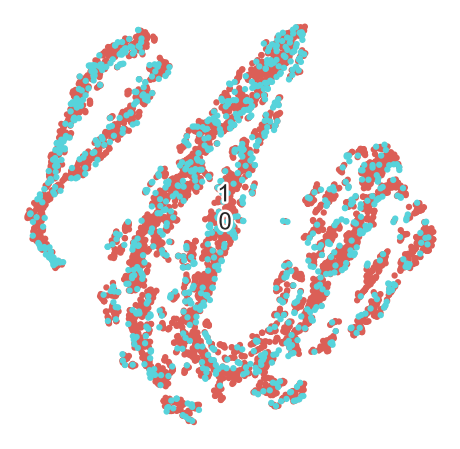

In [121]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities,
                                    _kl_divergence)
# from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We first reorder the data points according to the handwritten numbers.
X = np.vstack([all_vars_data_dupl[all_vars_data_dupl.FinalNFTI==i].drop(['FinalNFTI', 'MRN', 'LastName', 'EDArrival', 'ISS', 'PHHoTN', 'FinalIntwithin3', 'EDHoTN', 'TFIR', 'ICP', 'Craniotomy'], axis=1)
               for i in range(2)])
y = np.hstack([all_vars_data_dupl[all_vars_data_dupl.FinalNFTI==i].FinalNFTI
               for i in range(2)])

digits_proj = TSNE(random_state=RS).fit_transform(X)

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, y)
# plt.savefig('images/digits_tsne-generated.png', dpi=120)

In [129]:
all_vars_data.Age.describe()

count    5138.000000
mean       48.866962
std        21.050805
min        18.030000
25%        29.750000
50%        47.625000
75%        65.227500
max       104.400000
Name: Age, dtype: float64